# Analyse des données d'expérience

Expérience: J7 Energie Solaire

Date: 2023-09-30

In [11]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# Save figs for latex
import matplotlib as mpl
import tikzplotlib as tikz
from options import *

## Expérience 2: Puissance max

### Amorphe

In [13]:
amorphed40 = np.loadtxt("../data/Ir(Ud),amorphe,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
amorphed70 = np.loadtxt("../data/Ir(Ud),amorphe,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)

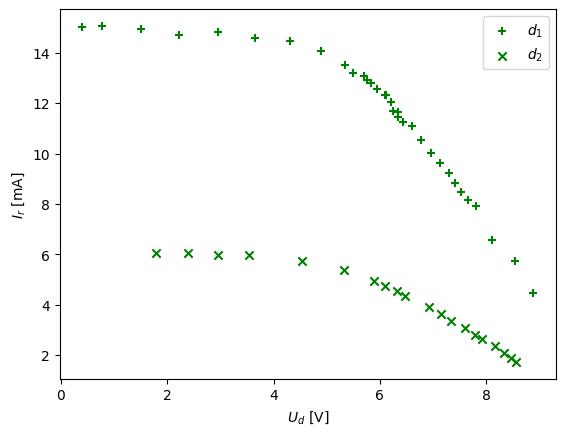

In [14]:
plt.scatter(amorphed40[:,1], amorphed40[:,2], marker="+", color=colors["A"], label="$d_1$")
plt.scatter(amorphed70[:,1], amorphed70[:,2], marker="x", color=colors["A"], label="$d_2$")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/Ir(U),A.tikz")

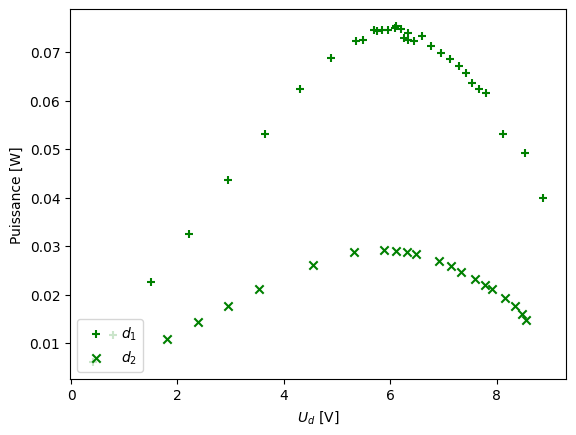

In [15]:
# Puissances
# [W] = [V] * [A]
puis_amorphed40 = amorphed40[:,1] * amorphed40[:,2] * 1e-3
puis_amorphed70 = amorphed70[:,1] * amorphed70[:,2] * 1e-3

plt.scatter(amorphed40[:,1], puis_amorphed40, marker="+", color=colors["A"], label="$d_1$")
plt.scatter(amorphed70[:,1], puis_amorphed70, marker="x", color=colors["A"], label="$d_2$")
plt.legend(loc='lower left')
# plt.title("$P(U_d)$, amorphe")
plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/P(U),A.tikz")

### Monocristallin

### Polycristallin

In [16]:
monod40 = np.loadtxt("../data/Ir(Ud),monocristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
monod40U = monod40[:,1]
delta_monod40U = np.ones(len(monod40U)) * 0.004 * 3 + monod40U * 0.005
monod40I = monod40[:,2]
delta_monod40I = np.ones(len(monod40I)) * 0.004 * 3000 + monod40I * 0.01

monod70 = np.loadtxt("../data/Ir(Ud),monocristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)
monod70U = monod70[:,1]
delta_monod70U = np.ones(len(monod70U)) * 0.004 * 3 + monod70U * 0.005
monod70I = monod70[:,2]
delta_monod70I = np.ones(len(monod70I)) * 0.004 * 3000 + monod70I * 0.01

In [17]:
polyd40 = np.loadtxt("../data/Ir(Ud),polycristallin,d=40cm.csv", delimiter=",", skiprows=1, dtype=float)
polyd40U = polyd40[:,1]
delta_polyd40U = np.ones(len(polyd40U)) * 0.004 * 3 + polyd40U * 0.005
polyd40I = polyd40[:,2]
delta_polyd40I = np.ones(len(polyd40I))  * 0.004 * 3000 + polyd40I * 0.01

polyd70 = np.loadtxt("../data/Ir(Ud),polycristallin,d=70cm.csv", delimiter=",", skiprows=1, dtype=float)
polyd70U = polyd70[:,1]
delta_polyd70U = np.ones(len(polyd70U)) * 0.004 * 3 + polyd70U * 0.005
polyd70I = polyd70[:,2]
delta_polyd70I = np.ones(len(polyd70I)) * 0.004 * 3000 + polyd70I * 0.01
print(polyd70I)
delta_polyd70I

[ 1.85  4.48  5.07  6.94  8.49 12.88 14.33 15.37 16.84 19.46 22.84 29.
 31.   34.   38.   39.   48.   54.   63.   74.   83.   83.   89.   84.
 87.  ]


array([12.0185, 12.0448, 12.0507, 12.0694, 12.0849, 12.1288, 12.1433,
       12.1537, 12.1684, 12.1946, 12.2284, 12.29  , 12.31  , 12.34  ,
       12.38  , 12.39  , 12.48  , 12.54  , 12.63  , 12.74  , 12.83  ,
       12.83  , 12.89  , 12.84  , 12.87  ])

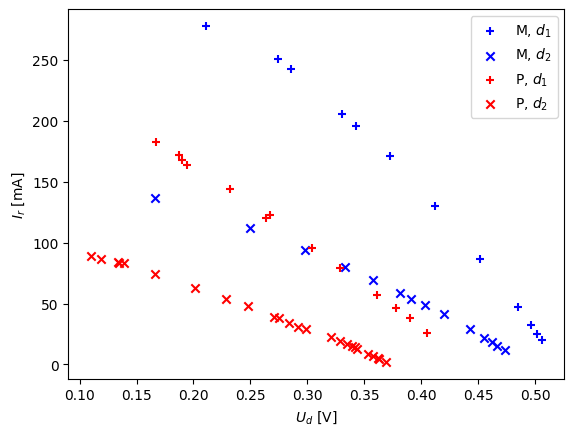

In [18]:
plt.scatter(monod40U, monod40I, marker="+", color=colors["M"], label="M, $d_1$")
plt.scatter(monod70U, monod70I, marker="x", color=colors["M"], label="M, $d_2$")

plt.scatter(polyd40U, polyd40I, marker='+', color=colors["P"], label="P, $d_1$")
plt.scatter(polyd70U, polyd70I, marker='x', color=colors["P"], label="P, $d_2$")
plt.legend()
# plt.title("$I_r(U_d)$, Cellule Polycristalline")
plt.xlabel("$U_d$ [V]")
plt.ylabel("$I_r$ [mA]")
tikz.save("../plots/Ir(U),MP.tikz")

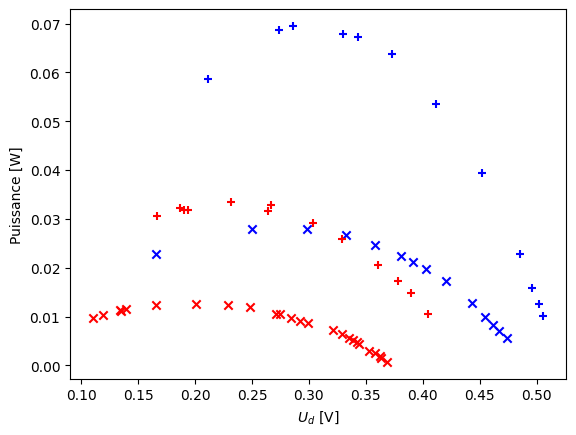

In [19]:
# Puissances
# [W] = [V] * [A]
puis_monod40 = monod40[:,1] * monod40[:,2] * 1e-3
delta_puis_monod40 = monod40I * 1e-3 * delta_monod40U + delta_monod40I * 1e-3 * monod40U
puis_monod70 = monod70[:,1] * monod70[:,2] * 1e-3
delta_puis_monod70 = monod70I * 1e-3 * delta_monod70U + delta_monod70I * 1e-3 * monod70U

plt.scatter(monod40U, puis_monod40, marker="+", color=colors["M"], label="M, $d_1$")
plt.scatter(monod70U, puis_monod70, marker="x", color=colors["M"], label="M, $d_2$")
# plt.title("$P(U_d)$, Cellule Monocristalline")

# Puissances
# [W] = [V] * [A]
puis_polyd40 = polyd40[:,1] * polyd40[:,2] * 1e-3
delta_puis_polyd40 = polyd40I * 1e-3 * delta_polyd40U + delta_polyd40I * 1e-3 * polyd40U
puis_polyd70 = polyd70[:,1] * polyd70[:,2] * 1e-3
delta_puis_polyd70 = polyd70I * 1e-3 * delta_polyd70U + delta_polyd70I * 1e-3 * polyd70U

plt.scatter(polyd40U, puis_polyd40, marker="+", color=colors["P"], label="P, $d_1$")
plt.scatter(polyd70U, puis_polyd70, marker="x", color=colors["P"], label="P, $d_2$")

plt.xlabel("$U_d$ [V]")
plt.ylabel("Puissance [W]")
tikz.save("../plots/P(U),MP.tikz")

### Pmax

In [20]:
pmax_monod40_idx = np.argmax(puis_monod40)
print(f"Pmax mono d_1: {puis_monod40[pmax_monod40_idx]} +- {delta_puis_monod40[pmax_monod40_idx]} W")

pmax_monod70_idx = np.argmax(puis_monod70)
print(f"Pmax mono d_2: {puis_monod70[pmax_monod70_idx]} +- {delta_puis_monod70[pmax_monod70_idx]} W")


pmax_polyd40_idx = np.argmax(puis_polyd40)
print(f"Pmax poly d_1: {puis_polyd40[pmax_polyd40_idx]} +- {delta_puis_polyd40[pmax_polyd40_idx]} W")

pmax_polyd70_idx = np.argmax(puis_polyd70)
print(f"Pmax poly d_2: {puis_polyd70[pmax_polyd70_idx]} +- {delta_puis_polyd70[pmax_polyd70_idx]} W")


Pmax mono d_1: 0.06949799999999999 +- 0.00739047 W
Pmax mono d_2: 0.028012000000000002 +- 0.00512418 W
Pmax poly d_1: 0.033408 +- 0.005013120000000001 W
Pmax poly d_2: 0.012663 +- 0.0033579450000000006 W


### Rendement

In [22]:
Pgamma_d40 = 149.0 * 0.01
Pgamma_d70 = 62.1 * 0.01
print(f"Rendement max mono d_1: {puis_monod40[pmax_monod40_idx]/Pgamma_d40}")
print(f"Rendement max mono d_2: {puis_monod70[pmax_monod70_idx]/Pgamma_d70}")

print(f"Rendement max poly d_1: {puis_polyd40[pmax_polyd40_idx]/Pgamma_d40}")
print(f"Rendement max poly d_2: {puis_polyd70[pmax_polyd70_idx]/Pgamma_d70}")


Rendement max mono d_1: 0.04664295302013422
Rendement max mono d_2: 0.04510789049919485
Rendement max poly d_1: 0.022421476510067113
Rendement max poly d_2: 0.02039130434782609
